In [6]:
!wget --no-check-certificate \
      https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/face-recognition-opencv/face-recognition-opencv.zip \
      -O /content/face-recognition-opencv.zip

--2020-08-19 16:18:34--  https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/face-recognition-opencv/face-recognition-opencv.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.232.48
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.232.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 356544079 (340M) [application/zip]
Saving to: ‘/content/face-recognition-opencv.zip’

/content/face-recog 100%[===================>] 340.03M  34.5MB/s    in 11s     

2020-08-19 16:18:45 (32.4 MB/s) - ‘/content/face-recognition-opencv.zip’ saved [356544079/356544079]



In [7]:
import os
import zipfile

local_zip = '/content/face-recognition-opencv.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [8]:
import pickle
import cv2
import os
from imutils import paths

In [9]:
!pip install face_recognition

In [10]:
!pip install dlib

In [11]:
import dlib
import face_recognition

In [12]:
print("[INFO] loading encodings...")
data = pickle.loads(open('/content/face-recognition-opencv/encodings.pickle',"rb").read())

[INFO] loading encodings...


In [13]:
image = cv2.imread('/content/face-recognition-opencv/examples/example_01.png')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [14]:
# detect the (x, y)-coordinates of the bounding boxes corresponding
# to each face in the input image, then compute the facial embeddings
# for each face
print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb,
	model="cnn")
encodings = face_recognition.face_encodings(rgb, boxes)

# initialize the list of names for each face detected
names = []


[INFO] recognizing faces...


In [15]:
# loop over the facial embeddings
for encoding in encodings:
	# attempt to match each face in the input image to our known
	# encodings
	matches = face_recognition.compare_faces(data["encodings"],
		encoding)
	name = "Unknown"

	# check to see if we have found a match
	if True in matches:
		# find the indexes of all matched faces then initialize a
		# dictionary to count the total number of times each face
		# was matched
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}
    # loop over the matched indexes and maintain a count for
		# each recognized face face
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1

		# determine the recognized face with the largest number of
		# votes (note: in the event of an unlikely tie Python will
		# select first entry in the dictionary)
		name = max(counts, key=counts.get)
	
	# update the list of names
	names.append(name)

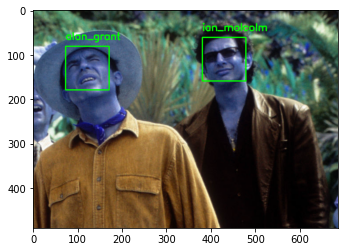

In [29]:
import matplotlib.pyplot as plt
#%matplotlib inline
# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
	# draw the predicted face name on the image
	cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
	y = top - 15 if (top - 15) > 15 else top + 15
	cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

# show the output image
plt.imshow(image)
#cv2.waitKey(0)
plt.show()